<h2>Machine Learning: Linear Regression Multiple Variables</h2>

<h3 style="color:purple">Sample problem of predicting home price in monroe, new jersey (USA)</h3>

In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model
df = pd.read_csv('homeprices.csv')
df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


**Data Preprocessing: Fill NA values with median value of a column**

In [2]:
df.bedrooms.median()

np.float64(4.0)

In [3]:
df.bedrooms = df.bedrooms.fillna(df.bedrooms.median())
df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,4.0,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


In [4]:
reg = linear_model.LinearRegression()
reg.fit(df.drop('price',axis='columns'),df.price)

LinearRegression()

In [5]:
reg.coef_

array([  112.06244194, 23388.88007794, -3231.71790863])

In [6]:
reg.intercept_

np.float64(221323.0018654043)

**Find price of home with 3000 sqr ft area, 3 bedrooms, 40 year old**

In [7]:
reg.predict([[3000, 3, 40]])

c:\Users\Abdul Ahad\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([498408.25158031])

In [8]:
112.06244194*3000 + 23388.88007794*3 + -3231.71790863*40 + 221323.00186540384

498408.25157402386

**Find price of home with 2500 sqr ft area, 4 bedrooms,  5 year old**

In [9]:
reg.predict([[2500, 4, 5]])

c:\Users\Abdul Ahad\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([578876.03748933])

<h3>Exercise<h3>

There is **hiring.csv**. This file contains hiring statics for a firm such as experience of candidate, his written test score and personal interview score. Based on these 3 factors, HR will decide the salary. Given this data, you need to build a machine learning model for HR department that can help them decide salaries for future candidates. Using this predict salaries for following candidates,


**2 yr experience, 9 test score, 6 interview score**

**12 yr experience, 10 test score, 10 interview score**


C:\Users\Abdul Ahad\AppData\Local\Temp\ipykernel_14612\3779201398.py:19: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1['experience'] = df1['experience'].replace(word_to_num)
c:\Users\Abdul Ahad\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


[47025.70756135 79521.50836585]


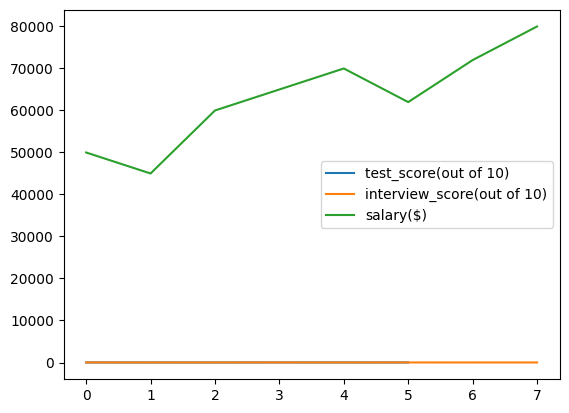

In [11]:
import pandas as pd
from sklearn import linear_model
import math

# Step 1: Load CSV
df1 = pd.read_csv('hiring.csv')
df1.plot()

# Step 2: Fill missing test scores with mean
test_score_mean = df1['test_score(out of 10)'].mean()
df1['test_score(out of 10)'] = df1['test_score(out of 10)'].fillna(test_score_mean)

# Step 3: Convert experience (words to numbers)
word_to_num = {
    'zero': 0, 'one': 1, 'two': 2, 'three': 3, 'four': 4,
    'five': 5, 'six': 6, 'seven': 7, 'eight': 8,
    'nine': 9, 'ten': 10, 'eleven': 11
}
df1['experience'] = df1['experience'].replace(word_to_num)

# Step 4: Fill missing experience with floor of mean
mean_experience = df1['experience'].mean()
df1['experience'] = df1['experience'].fillna(math.floor(mean_experience))

# Step 5: Prepare data for model
X = df1[['experience', 'test_score(out of 10)', 'interview_score(out of 10)']]
y = df1['salary($)']

# Step 6: Train model
model = linear_model.LinearRegression()
model.fit(X, y)

# Step 7: Predict salaries
predicted_salaries = model.predict([[2, 9, 6], [12, 10, 7]])
print(predicted_salaries)
